---
# **Street View Housing Number Digit Recognition**

---
#####Project developed within MIT
---


#### **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

#### **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

#### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

---
### **Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
#For scaling features which preparing the steps to normalize the data
from sklearn.preprocessing import MinMaxScaler

# For building training and evaluating neural networks.
import tensorflow as tf

#The Sequential class in tensorflow.keras provides an easy way to build neural network models by stacking layers sequentially.
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

#To convert integers into one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

#Classification tasks with one-hot encoded targets measuring true vs. predicted probabilities
from tensorflow.keras.losses import categorical_crossentropy

import warnings
warnings.filterwarnings("ignore")

**Check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.15.0


---
## **Load the Dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
#To be able to use a.h5 files
import h5py

# Open the HDF5 file
file_path = '/content/drive/MyDrive/MIT/Projects/Elective Project_Street View Housing Number Digit Recognition_Deep Learning/data/SVHN_single_grey1.h5'
h5f_data = h5py.File(file_path, 'r') #read mode

# Get the training and the test data
x_train = h5f_data['X_train'][:]
y_train = h5f_data['y_train'][:]

x_test = h5f_data['X_test'][:]
y_test = h5f_data['y_test'][:]

# Close the data

h5f_data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]

num_train_images, num_test_images

(42000, 18000)

####**Observation:**

The training dataset contains 42.000 images and the testing dataset contains 18.000 images.

---
## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

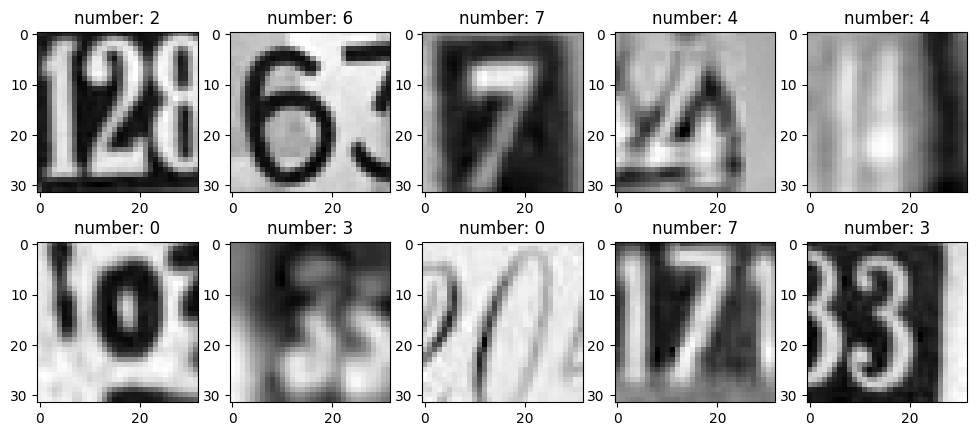

In [ ]:
# Number of  rows and columns
rows = 2
col = 5

# prepare the plot
fig = plt.figure(figsize=(12, 5))

# First 10 images and their numbers
for i in range(10):

    # Create the plot
    plt.subplot(rows, col, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"number: {y_train[i]}")

plt.show()

---
## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Print the shape and the array of pixels for the first image in the training dataset.
shape_train =x_train[0].shape
array_train= x_train[0]

print("Shape of the first training image:", shape_train)
print('_'*65)
print("Array of pixels for the first training image:")
print(array_train)

Shape of the first training image: (32, 32)
_________________________________________________________________
Array of pixels for the first training image:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


####**Observation:**

The first image is a 32x32 square image.

---
### **Normalize the train and the test data**

In [ ]:
# Reshape data
x_train = x_train.reshape(x_train.shape[0], 1024)
x_test = x_test.reshape(x_test.shape[0], 1024)

In [ ]:
# Normalize the train and the test dataset by dividing by 255
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

Print the shapes of Training and Test data

In [ ]:
# Print the new shapes of the train and the test dataset
print('Training set:', x_train_norm.shape, y_train.shape)
print('Test set:', x_test_norm.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


---
### **One-hot encode output**

In [ ]:
# One-hot encode the target variable y
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# output the One-hot encoded y_train
y_train_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

####**Observation:**

- The first image's 32x32 pixel shape and its range of pixel values confirm the dataset's consistency.
- Reshaping to a 1D array of 1024 pixels and normalizing the pixel values between 0-1 will help with model training and performance.
- The y values are between 0-9 and one-hot encoding will allow the model to predict class probabilities.


---
#**Artificial Neural Networks (ANN)**
---

##**Model - 1**
#####Now that we have done the data preprocessing, let's build an ANN model.

---
Fix the seed for random number generators

In [ ]:
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

---
### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train the ANN Model - 1 as per the above mentioned architecture.**

In [ ]:
# function that creates a Sequential model with the specified architecture
def nn_model_1(input_shape=(1024,), num_classes=10):
    model = Sequential()

    # First hidden layer with 64 nodes and ReLU activation
    model.add(Dense(64, activation='relu', input_shape=input_shape, name='hidden_layer_1'))

    # Second hidden layer with 32 nodes and ReLU activation
    model.add(Dense(32, activation='relu', name='hidden_layer_2'))

    # Output layer with softmax activation and 10 nodes (number of classes)
    model.add(Dense(num_classes, activation='softmax', name='output_layer'))

    # Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])

    return model

In [ ]:
# create Model_1 using the function and print its summary
Model_1=nn_model_1()
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 64)                65600     
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20
Model_1_hist=Model_1.fit(x_train_norm, y_train_encoded, validation_split=0.2, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 6ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

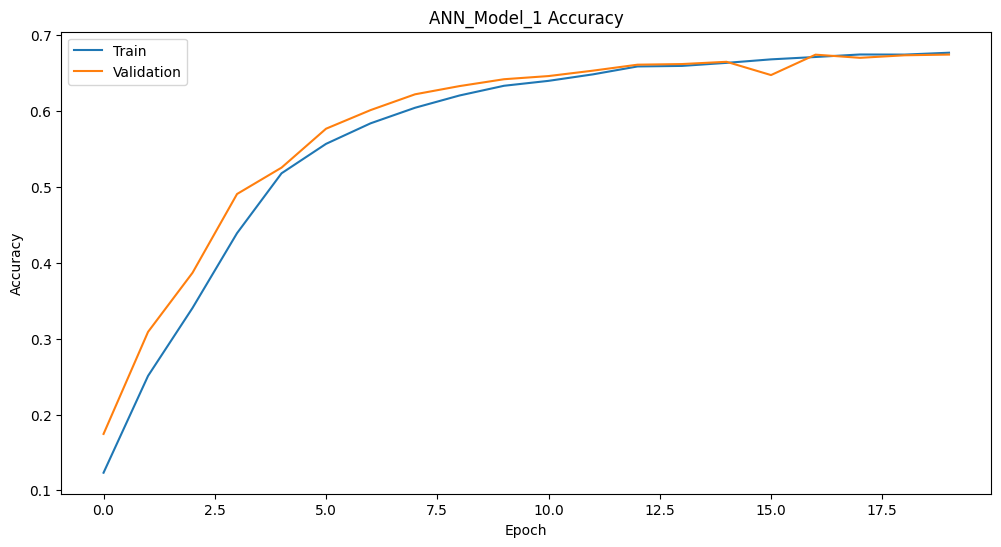

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(Model_1_hist.history['accuracy'], label='Train Accuracy')
plt.plot(Model_1_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN_Model_1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

####**Observations:**

- The training and validation accuracies increase together indicating the ANN model1 is learning well.
- Validation and training accuracy indicate good generalization to unseen data and no overfitting.
- However both accuracies are under 0.7 showing the model's performance could improve with some tuning.
- The ANN Model 1 has relatively a simple architecture with two hidden layers (64 and 32 nodes) and one output layer.

---
##**Second Model**
#####Build one more model with higher complexity and see if we can improve the performance of the model.
---

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend
backend.clear_session()

In [ ]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

---
### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

---
### **Build and train the Second ANN model as per the above mentioned architecture**

In [ ]:
# function that creates a Sequential model with the specified architecture
def nn_model_2(input_shape=(1024,), num_classes=10):
    model = Sequential()

    #First hidden layer with 256 nodes and ReLU activation
    model.add(Dense(256, activation='relu', input_shape=input_shape, name='hidden_layer_1'))

    #Second hidden layer with 128 nodes and ReLU activation
    model.add(Dense(128, activation='relu', name='hidden_layer_2'))

    #Dropout layer with a rate of 0.2
    model.add(Dropout(0.2))

    #Third hidden layer with 64 nodes and the relu activation
    model.add(Dense(64, activation='relu', name='hidden_layer_3'))

    #Fourth hidden layer with 64 nodes and the relu activation
    model.add(Dense(64, activation='relu', name='hidden_layer_4'))

    #Fifth hidden layer with 64 nodes and the relu activation
    model.add(Dense(32, activation='relu', name='hidden_layer_5'))

    #BatchNormalization layer
    model.add(BatchNormalization())

    #Output layer with softmax activation and 10 nodes (number of classes)
    model.add(Dense(num_classes, activation='softmax', name='output_layer'))

    #Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy
    model.compile(optimizer=Adam(learning_rate=0.0005), loss=categorical_crossentropy, metrics=['accuracy'])

    return model

In [ ]:
# create Model_1 using the function and print its summary
Model_2=nn_model_2()
Model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 256)               262400    
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden_layer_3 (Dense)      (None, 64)                8256      
                                                                 
 hidden_layer_4 (Dense)      (None, 64)                4160      
                                                                 
 hidden_layer_5 (Dense)      (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
Model_2_hist=Model_2.fit(x_train_norm, y_train_encoded, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 5s 11ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 4s 14ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 4s 14ms/step - loss: 2.1699 - accuracy: 0.1746 - val_loss: 2.0564 - val_accuracy: 0.2769
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.6402 - accuracy: 0.4238 - val_loss: 1.4454 - val_accuracy: 0.5273
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.3608 - accuracy: 0.5385 - val_loss: 1.3064 - val_accuracy: 0.5701
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2484 - accuracy: 0.5870 - val_loss: 1.1214 - val_accuracy: 0.6388
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 1.1568 - accuracy: 0.6251 - val_loss: 1.1023 - val_accuracy: 0.6400

### **Plot the Training and Validation Accuracies and write down your Observations.**

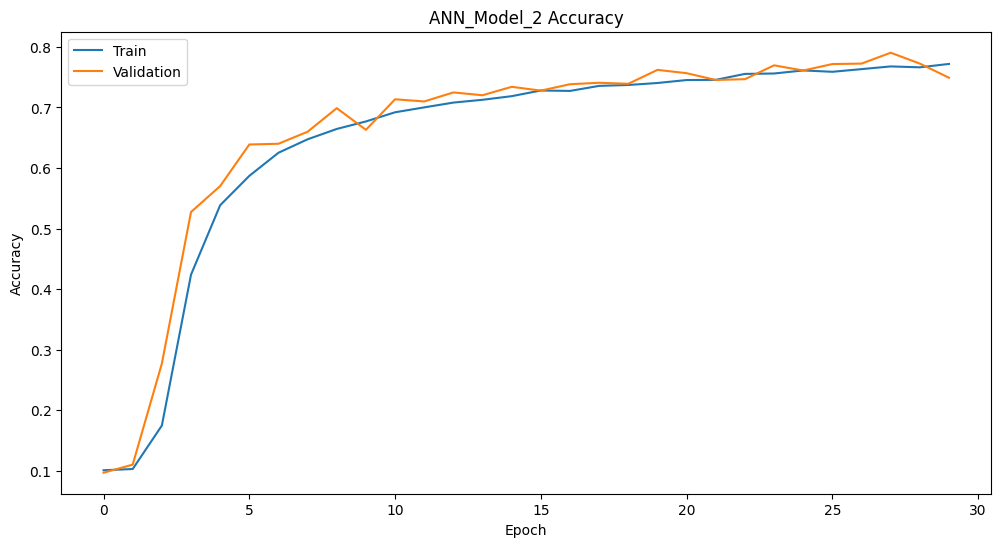

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(Model_2_hist.history['accuracy'], label='Train Accuracy')
plt.plot(Model_2_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN_Model_2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

####**Observations:**

- The second model is more complex since it has more hidden layers, dropout for regularization, and batch normalization.

- It's complex architecture and additional regularization techniques led to higher accuracy and better learning capacity.

- Even though the second model is more sophisticated the dropout and batch normalization help manage overfitting.

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

---
## **Predictions on the test data using Model - 2**
---

In [ ]:
# Make predictions on the test set using Model_2
test_pred = Model_2.predict(x_test_norm)

563/563 [==============================] - 2s 3ms/step


In [ ]:
# Convert the predicted probabilities to class labels
test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert one-hot encoded vectors to single labels for true test labels
y_test = np.argmax(y_test_encoded, axis=-1)

### **Print the classification report and the confusion matrix for the test predictions.**

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1814
           1       0.59      0.89      0.71      1828
           2       0.76      0.77      0.76      1803
           3       0.78      0.67      0.72      1719
           4       0.73      0.85      0.79      1812
           5       0.82      0.67      0.73      1768
           6       0.76      0.72      0.74      1832
           7       0.75      0.82      0.78      1808
           8       0.71      0.71      0.71      1812
           9       0.83      0.65      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.76      0.74      0.74     18000
weighted avg       0.76      0.74      0.74     18000



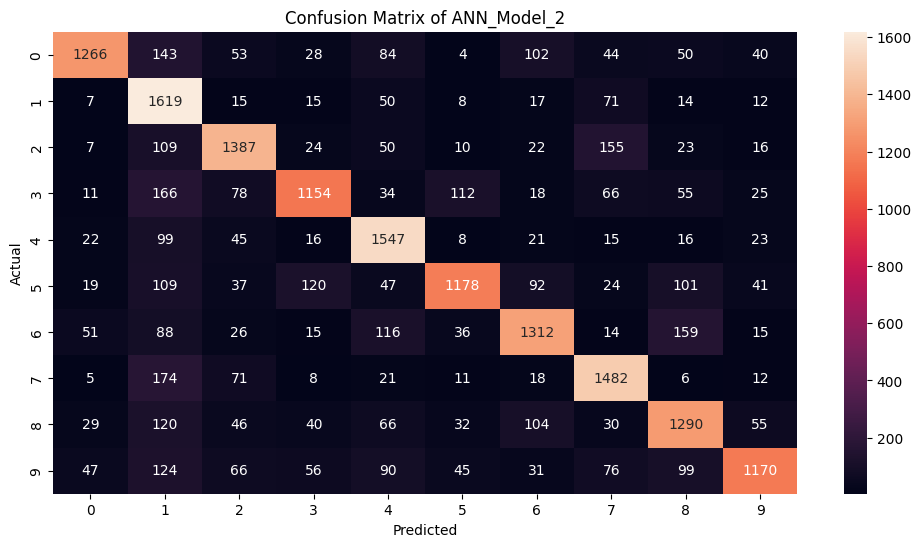

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test,test_pred)

# Ploting the heatmap using confusion matrix
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot = True,  fmt = '.0f')
plt.title('Confusion Matrix of ANN_Model_2')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

####**Final Observations:**

- The ANN model 2 shows a balanced performance with a 0.74 accuracy.
- Precision recall and F1-score are fairly consistent, indicating reliable classification without overfeeting.
- The confusion matrix highlights strong predictions for certain classes and areas needing improvement for others.
- Digit 1 is often confused with others and we observe some other partial confusions such as 8 with 6, and 7 with 2, etc.
- The prediction of the ANN Model 2 on the 18.000 unseen digits suggests that the model performs well but can be further optimized to reduce misclassifications and encrease accuracy.

---
# **Using Convolutional Neural Networks (CNN)**
---

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Open the HDF5 file
file_path = '/content/drive/MyDrive/MIT/Projects/Elective Project_Street View Housing Number Digit Recognition_Deep Learning/data/SVHN_single_grey1.h5'
h5f_data = h5py.File(file_path, 'r') #read mode

# Changing the X and Y letters into capitals to avoid data ovewriting with the ANN's model.
X_train = h5f_data['X_train'][:]
Y_train = h5f_data['y_train'][:]

X_test = h5f_data['X_test'][:]
Y_test = h5f_data['y_test'][:]

# Close the data

h5f_data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

####**Observation:**

The training dataset contains 42.000 images and the testing dataset contains 18.000 images.


---
### **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Print the shape and the array of pixels for the first image in the training dataset.

# Shape for the first image
print('First image Shape:', X_train[0].shape)

print('_____________________________________________________________')

# Array of pixels for the first image
print('First image Array:')
print(X_train[0])

First image Shape: (32, 32)
_____________________________________________________________
First image Array:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping function (the Value of 1) is due to black and white images.

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# 255 is representing the pixel value of the pixels in grayscale we need them to be between 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
# New 4D shape for X_train and X_test and 1D for Y_train and Y_test
print('Training set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


---
### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [ ]:
# output the One-hot encoded  Y_test variable.
Y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

####**Observation:**

- While reshaping the training data we use the value of 1 in the function due to the black and white images.

- When normalizing the inputs we observe that 255 represents the RGB value of the pixels. However since the digits are in grayscale we need them to be between 0-1.

- We observe that the new shape of the training and test data is 4-dimensional for X_train and X_test and 1-dimensional for Y_train and Y_test.

- The y values are between 0-9 and one-hot encoding will allow the model to predict class probabilities.

---
## **Convolutional Neural Networks Model - 1**
#####Now that we have done data preprocessing, let's build a CNN model.
---

In [ ]:
# Clearing back end
# Most Probably it does not need to be cleared since we changed the names and we now use CNN but lets be sure
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed at 42 for random number generators
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

---
### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train CNN Model - 1 as per the above mentioned architecture.**

In [ ]:
# # Define the second CNN model 1 function
def cnn_model_1():
    model = Sequential()

    # First Convolutional layer with 16 filters kernel size of 3x3 and 'same' padding
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with 32 filters kernel size of 3x3 and 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output from the previous layer
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Final output layer with 10 nodes and 'softmax' activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

In [ ]:
# create Model_1 using the function and print its summary
cnn_model_1 = cnn_model_1()
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# Fit the model on the training data
history_cnn_model_1 = cnn_model_1.fit(X_train, Y_train_encoded, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 71s 67ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 64s 61ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 61s 59ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 65s 61ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 67s 64ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 68s 65ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

### **Plot the Training and Validation Accuracies and Write your observations.**

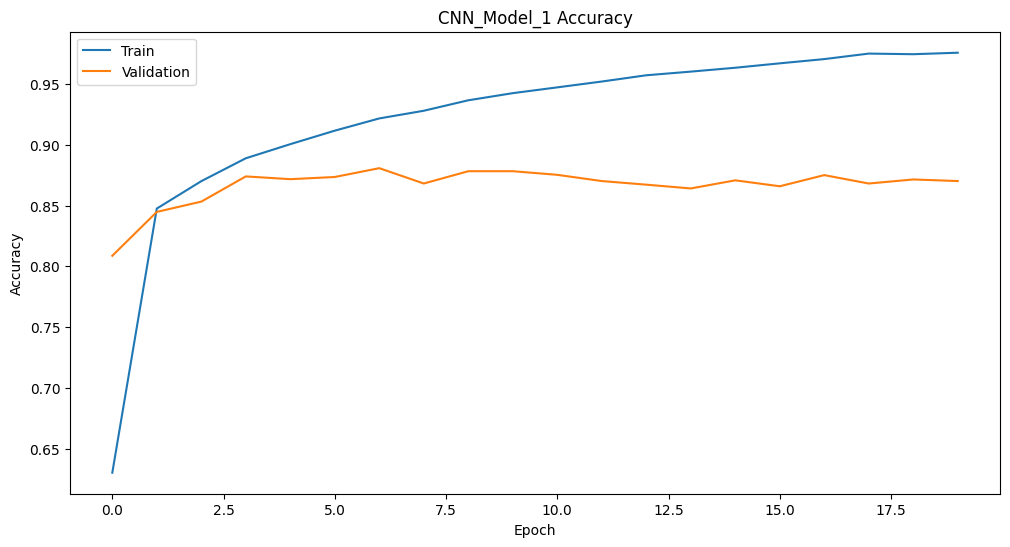

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(history_cnn_model_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_model_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN_Model_1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

####**Observations:**

- The training and validation accuracies do not increase together and the large gap between them indicates that the model is overfitting.
- The architecture of the CNN_model_1 will need to be reviewed.

---
##**CNN Model - 2**
#####Let's build another model and see if we can get a better model with generalized performance.
---

First we need to clear the previous model's history from the Keras backend. Also let's fix the seed again after clearing the backend.

In [ ]:
# Clearing back end
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed at 42 for random number generators
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Define the second CNN model 2 function
def cnn_model_2():
    model = Sequential()

    # First Convolutional layer with 16 filters kernel size of 3x3 and 'same' padding
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with 32 filters kernel size of 3x3 and 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer with 32 filters kernel size of 3x3 and 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization layer
    model.add(BatchNormalization())

    # Flatten the output from the previous layer
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Dropout layer with rate 0.5
    model.add(Dropout(0.5))

    # Final output layer with 10 nodes and 'softmax' activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [ ]:
# create cnn_model_2 using the function and print its summary
cnn_model_2 = cnn_model_2()
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the model on the training data
history_cnn_model_2 = cnn_model_2.fit(X_train, Y_train_encoded, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 125s 468ms/step - loss: 1.3222 - accuracy: 0.5483 - val_loss: 2.1225 - val_accuracy: 0.2112
Epoch 2/30
263/263 [==============================] - 118s 450ms/step - loss: 0.6654 - accuracy: 0.7950 - val_loss: 0.6373 - val_accuracy: 0.8208
Epoch 3/30
263/263 [==============================] - 117s 446ms/step - loss: 0.5528 - accuracy: 0.8313 - val_loss: 0.4480 - val_accuracy: 0.8737
Epoch 4/30
263/263 [==============================] - 121s 460ms/step - loss: 0.4908 - accuracy: 0.8507 - val_loss: 0.3992 - val_accuracy: 0.8823
Epoch 5/30
263/263 [==============================] - 116s 440ms/step - loss: 0.4349 - accuracy: 0.8633 - val_loss: 0.3909 - val_accuracy: 0.8885
Epoch 6/30
263/263 [==============================] - 116s 440ms/step - loss: 0.4038 - accuracy: 0.8755 - val_loss: 0.4107 - val_accuracy: 0.8852
Epoch 7/30
263/263 [==============================] - 122s 463ms/step - loss: 0.3835 - accuracy: 0.8814 - val_loss: 0.3952 -

### **Plot the Training and Validation accuracies and write your observations.**

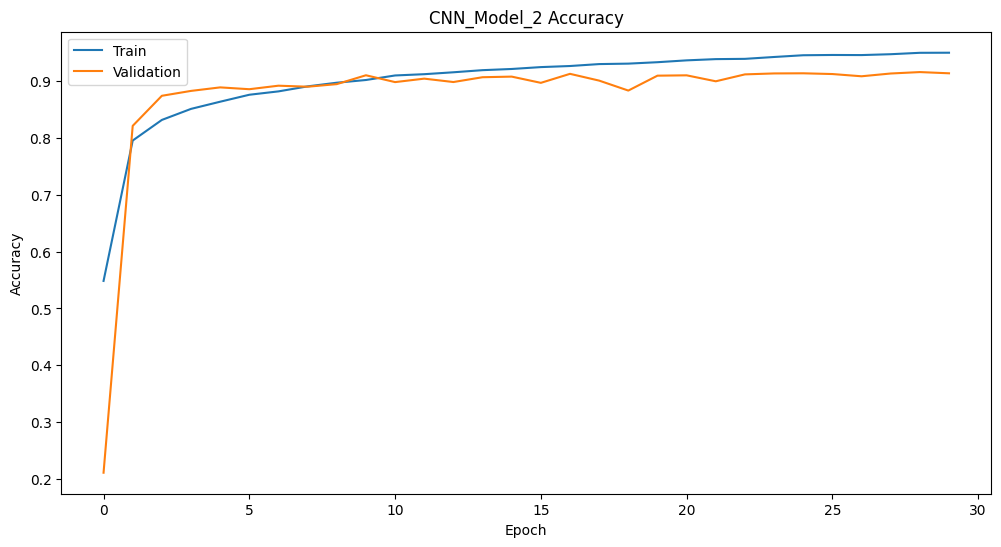

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.plot(history_cnn_model_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_model_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN_Model_2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

####**Observations:**

- The computation time of CNN_model_2 is considerably longer than CNN_model_1, but not at a worrying level.
- The CNN_model_2 with the use of convolutional layers achieves the highest accuracies around 0.9.
- The use of max pooling, batch normalization, and dropout, contributes to effective feature extraction and generalization avoiding overfitting.
- The close alignment of training and validation accuracies in the graph suggests good generalization to unseen data and no overfitting compared to CNN_model_1.

---
## **Predictions on the test data using the CNN Model - 2**
---

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make predictions on the test set using cnn_model_2
cnn_test_pred = cnn_model_2.predict(X_test)

563/563 [==============================] - 16s 28ms/step


In [ ]:
# Convert the predicted probabilities to class labels
cnn_test_pred = np.argmax(cnn_test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert one-hot encoded vectors to single labels for true test labels
Y_test = np.argmax(Y_test_encoded, axis=-1)

### **Print the classification report and the confusion matrix for the test predictions.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.92      0.88      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



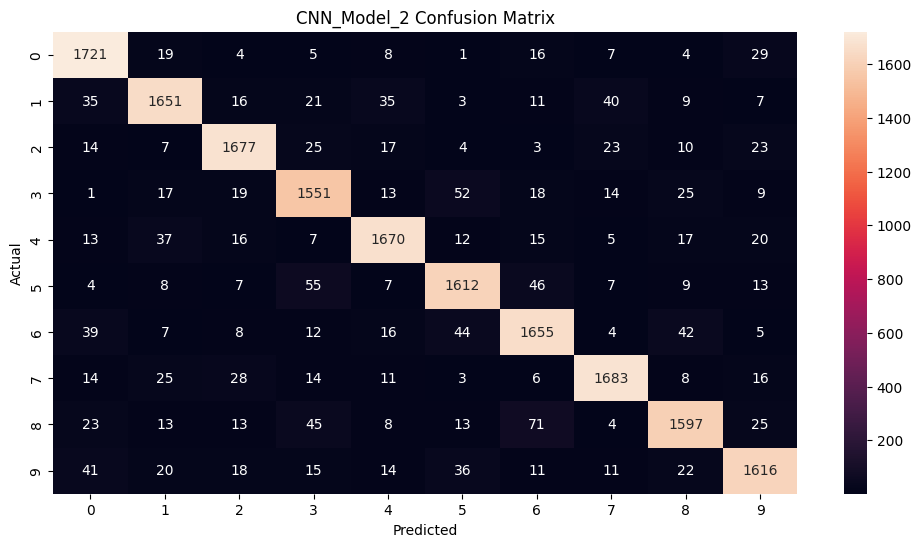

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(Y_test, cnn_test_pred))

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(Y_test, cnn_test_pred)

# Ploting the heatmap using confusion matrix
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot = True,  fmt = '.0f')
plt.title('CNN_Model_2 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

####**Final Observations:**

- From the confusion matrix we see that the CNN model 2 works much better than the ANN Model 2 model.
- The CNN model 2 has a high accuracy of 0.91 on the test set.
- Precision recall, and F1-scores show that the model works well on new data and does well across different categories.
- The small difference between training and validation accuracy, plus high test accuracy means the model is not overfitting.
- The CNN's Model 2 design including pooling, normalization, and dropout helps prevent overfitting, making it suitable for real-world digit recognition tasks.

---
## **Comparing the number of parameters in ANNs and CNNs**

- Accuracy: The CNN model is much more accurate than the ANN model (0.91 vs. 0.74).
- Parameter Efficiency: Even though the CNN model has fewer parameters (164.362 vs. 310.250) it performs better showing it learns and generalizes more efficiently.
- Confusion Matrix: The CNN model makes fewer mistakes in most categories compared to the ANN model showing it is better at handling image data because of its convolutional layers.
- Finally we can see that the strengths of convolutional neural networks in classifying images are very good at capturing  details in images providing to better performance and efficiency compared to traditional artificial neural networks.

---
####**Let's Work Together**
Christos Parapanisios - christosparapanisios@gmail.com

---